In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df[data.target_names[0]] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
0 in df.values

False

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое
### 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_scores(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    R2_train = model.score(X_train, y_train)
    RMSE_train = mean_squared_error(y_train, model.predict(X_train), squared=False)
    
    R2_test = model.score(X_test, y_test)
    RMSE_test = mean_squared_error(y_test, model.predict(X_test), squared=False)
    
    return R2_train, RMSE_train, R2_test, RMSE_test

In [7]:
X_1 = df.iloc[:,:-1]
y = df['MedHouseVal']
scores_1 = get_scores(X_1, y)

print(f'''R2_train: {scores_1[0]} RMSE_train: {scores_1[1]}
R2_test: {scores_1[2]} RMSE_test: {scores_1[3]}''')

R2_train: 0.6125511913966952 RMSE_train: 0.7196757085831575
R2_test: 0.5757877060324511 RMSE_test: 0.7455813830127761


### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

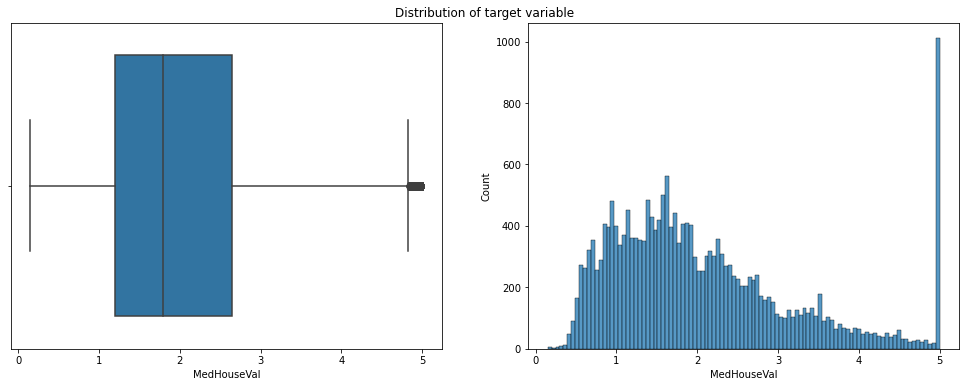

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(17, 6))

sns.boxplot(x=y, ax=axs[0])
sns.histplot(y, ax=axs[1], bins=100)
plt.title('Distribution of target variable', x=-0.1)

plt.show()

In [9]:
print('max MedHouseVal: ', df.MedHouseVal.max())
df.MedHouseVal.value_counts().head()

max MedHouseVal:  5.00001


5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
Name: MedHouseVal, dtype: int64

На обоих графиках заметно сосредоточение наблюдений в районе значения целевой переменной равного `5`. Боксплот определяет их как выбросы, и, глядя на гистограмму распределения целевой переменной можно сделать аналогичное предположение. Обращает на себя внимание и большое количество в 965 одинаковых значений у целевой переменной, равных `5.00001`, и то, что это наиболее частая цена объекта, и то, что по своей частоте она почти в 8 раз превышает следующую по популярности цену `1.37500`. На основании всего этого я бы сделал предположение, что всю недвижимость дороже 500 000 долл в этом датасете указали со стоимостью `5.00001`. В любом случае для нашей задачи не подойдут данные, имеющие такое распределение целевой переменной, поэтому я предпочту избавиться от объектов дороже 500 000 долл.

In [10]:
df = df[df.MedHouseVal < 5]

### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции
- a. Сделайте выводы
- b. Удалите признаки на основании полученных значений, выводов
- c. Повторите п. 3, п. 4 на измененных данных

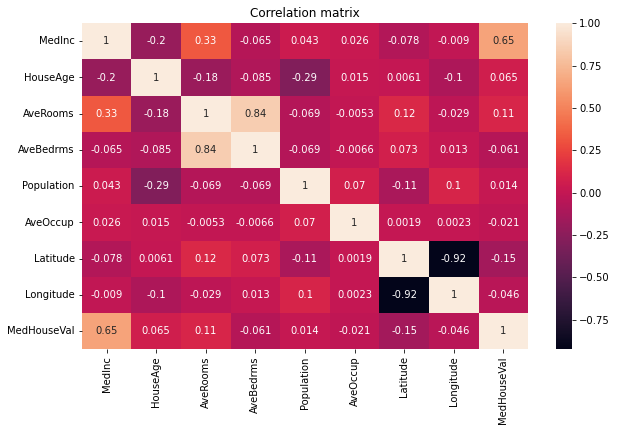

In [11]:
cor = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)
plt.title('Correlation matrix')
plt.show()

В датасете присутствует несколько признаков с ярковыраженной корреляцией:

- `MedHouseVal` и `MedInc` имеют положительную корреляцию уровня `0.65`. Поскольку здесь наблюдается корреляция между одним из признаков и целевой переменной, то коррелирующий признак лучше оставить, чтобы модель смогла с его помощью эффективнее предсказывать таргет. Необходимо при этом держать в уме, что модель будет крайне сильно опираться именно на этот признак, поскольку других, настолько же сильно коррелирующих с целевой переменной параметров нет даже и близко.


- `AveRooms` и `AveBedrms` логичным образом также имеют высокий коэффициент корреляции `0.84`. Попробую оставить только один из этих признаков, и выберу тот, который сильнее связан с целевой переменной. `AveRooms` имеет коээфициент корреляции с таргетом `0.11`, поэтому будем оставляю его.


- `Latitude` и `Longitude` также показывают высокую степень взаимосвязи с отрицательным коэффициентом корреляции `-0.92`. Это объясняется географической протяженностью территории штата Калифорния с северо-запада на юго-восток. Аналогично предыдущей паре параметров оставлю тот, который показывает более сильную связь с таргетом. Коэффициент корреляции для долготы `Latitude` находится дальше от нуля и равняется `-0.15`, следовательно оставляю его.

In [12]:
df = df.drop(['AveBedrms', 'Longitude'], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422


In [13]:
X_2 = df.iloc[:,:-1]
y = df['MedHouseVal']
scores_2 = get_scores(X_2, y)

print(f'''R2_train: {scores_2[0]} RMSE_train: {scores_2[1]}
R2_test: {scores_2[2]} RMSE_test: {scores_2[3]}''')

R2_train: 0.4744677272245674 RMSE_train: 0.7025046832146269
R2_test: 0.46664479303059536 RMSE_test: 0.7150820843917173


### 7. Исследуйте оставленные признаки на выбросы
- a. Удалите выбросы в случае обнаружения
- b. Повторите п. 3, п. 4 на измененных данных

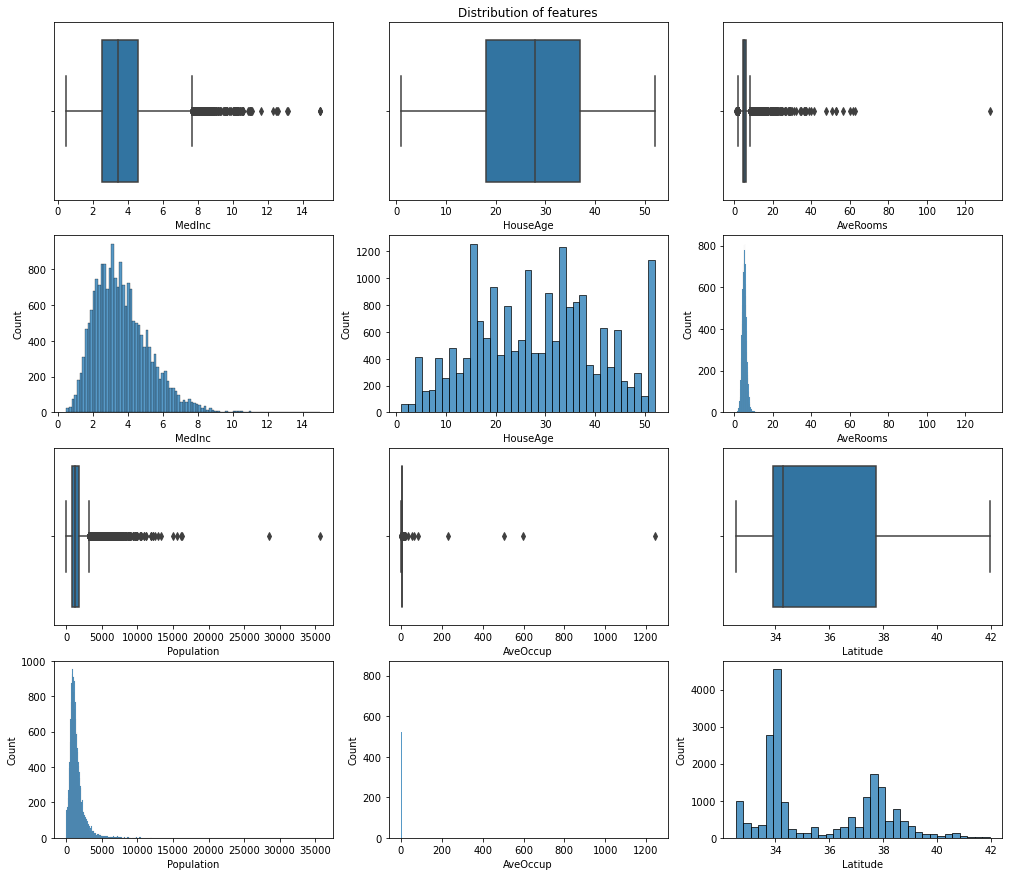

In [14]:
fig, axs = plt.subplots(4, 3, figsize=(17, 15))

for i, column in enumerate(df.columns[:-1]):
    k = (i//3) * ((i//3) + 1)
    sns.boxplot(x=df[column], ax=axs[k, i%3])
    sns.histplot(df[column], ax=axs[k+1, i%3])

plt.title('Distribution of features', x=-0.7, y=4.6)
plt.show()

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
count,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000
mean,3.676411,28.373066,5.361708,1441.368485,3.096560,35.651872,1.920553
std,1.570602,12.504050,2.293321,1144.075196,10.639195,2.150066,0.971109
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,0.149990
25%,2.526300,18.000000,4.416667,796.000000,2.446614,33.930000,1.164750
50%,3.449050,28.000000,5.185730,1179.000000,2.837779,34.270000,1.736000
75%,4.582500,37.000000,5.971083,1746.250000,3.306021,37.730000,2.479000
max,15.000100,52.000000,132.533333,35682.000000,1243.333333,41.950000,4.991000


- Для параметров `HouseAge` и `Latitude` визуальный анализ не определяет выбросы. От минимума до максимума значения в обоих столбцах лежат во вполне разумных и объяснимых рамках. Попробую этому довериться.


- Относительно параметра `AveRooms` в описании датасета сказано, что значения в этом столбце могут быть очень большими для курортных районов, где наблюдается высокая концентрация пустующих домов. Верхние выбросы для этого признака на боксплоте расположены довольно плотно, за исключением одного, самого значительного. Его я и поробую удалить, как и значения меньше `1`.

In [16]:
print(df.AveRooms.sort_values(ascending=False))
df = df[df.AveRooms.between(1, 100)]

1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
            ...    
14818      1.130435
17820      1.130435
3126       1.000000
8219       0.888889
5916       0.846154
Name: AveRooms, Length: 19648, dtype: float64


- Для параметра `MedInc`, обозначающего медианный уровень дохода жителей района я также подчищу выбросы сверху. Я не стану избавляться от выбросов полностью, так как мне не кажется, что это на самом деле ошибки в данных. Скорее всего это районы, в которых действительно значительно более высокий уровень доходов жителей, относительно других районов. Также я помню, что это наиболее сильно коррелирующий с целевой переменной признак. Я избавлюсь от объектов со значением `MedInc` более `11`.

In [17]:
print(df.MedInc.sort_values(ascending=False).head(10))
df = df[df.MedInc < 11]

18504    15.0001
1566     15.0001
18501    15.0001
10517    13.1477
10155    13.1107
1564     12.5915
11912    12.5381
16828    12.5000
17798    12.3292
131      11.6017
Name: MedInc, dtype: float64


- Про `Population` в описании датасета сказано, что обычно население района составляет от 600 до 3000 человек. На боксплоте примерно со значения `3000` точки как раз начинают классифицироваться как выбросы. Я возьму несколько большее значение `5000` для отсечения верхних выбросов.


- Есть сходство с предыдущим признаком в распределении параметра `AveOccup`. Это среднее количество жителей в домах района. Здесь есть как экстремально высокие значения, так и значения меньше `1`. Я избавлюсь от значений свыше `10` и меньше `1`. Это позволит значительно сократить разброс значений и при этом сохранить почти все наблюдения.

In [18]:
df = df[df.Population < 5000]
df = df[df.AveOccup.between(1, 10)]

In [19]:
X_3 = df.iloc[:,:-1]
y = df['MedHouseVal']
scores_3 = get_scores(X_3, y)

print(f'''R2_train: {scores_3[0]} RMSE_train: {scores_3[1]}
R2_test: {scores_3[2]} RMSE_test: {scores_3[3]}''')

R2_train: 0.5300923006326124 RMSE_train: 0.6617357685310332
R2_test: 0.5544513951756243 RMSE_test: 0.6653300132423112


### 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень
- a. Повторите п. 3, п. 4 на измененных данных.

In [20]:
for column in df.columns[:-1]:
    df[column+'_squared'] = df[column]**2
    df[column+'_sqrt'] = np.sqrt(df[column])
    df[column+'_log'] = np.log(df[column])

df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal,MedInc_squared,MedInc_sqrt,MedInc_log,...,AveRooms_log,Population_squared,Population_sqrt,Population_log,AveOccup_squared,AveOccup_sqrt,AveOccup_log,Latitude_squared,Latitude_sqrt,Latitude_log
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526,69.308955,2.885342,2.119287,...,1.943640,103684.0,17.944358,5.774552,6.530864,1.598611,0.938270,1434.8944,6.154673,3.634423
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585,68.913242,2.881215,2.116424,...,1.830682,5764801.0,49.000000,7.783641,4.451433,1.452529,0.746613,1433.3796,6.153048,3.633895
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521,52.669855,2.693956,1.982022,...,2.114825,246016.0,22.271057,6.206576,7.852660,1.673995,1.030426,1432.6225,6.152235,3.633631
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413,31.844578,2.375521,1.730434,...,1.760845,311364.0,23.622024,6.324359,6.492025,1.596228,0.935287,1432.6225,6.152235,3.633631
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422,14.793254,1.961173,1.347086,...,1.837665,319225.0,23.769729,6.336826,4.758799,1.476979,0.779998,1432.6225,6.152235,3.633631


In [21]:
X_4 = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']
scores_4 = get_scores(X_4, y)

print(f'''R2_train: {scores_4[0]} RMSE_train: {scores_4[1]}
R2_test: {scores_4[2]} RMSE_test: {scores_4[3]}''')

R2_train: 0.5856620334481295 RMSE_train: 0.6213777450347949
R2_test: 0.609333056146113 RMSE_test: 0.6230069673181968


### 9. Сформулируйте выводы по проделанной работе.
- a. Кратко опишите какие преобразования были сделаны с данными.
- b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
- c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

На последнем этапе работы с переменными я добавил для каждого из оставшихся признаков 4 дополнительных столбца с преобразованными значениями признака:
- Возведение в квадрат
- Взятие квадратного корня
- Взяите натурального логарифма

Для сравнения работы моделей я буду обращать внимание на метрики R2 и RMSE для тестового подмножества. На протяжении работы с переменными я получал улучшение показателя RMSE на каждом этапе, то есть потери в работе модели неминуемо сокращались. При этом метрика R2 сначала резко ухудшилась после удаления двух признаков и выбросов в целевой переменной. Сейчас я предполагаю, что такое ухудшение вызвало удаление мной полезного признака `Longitude`. На следующем этапе, после работы с выбросами в других переменных R2 заметно подрос, но не догнал значение метрики на первом этапе.

На последнем этапе я не стал выбирать отдельные признаки для преобразований, проделав каждое из выбранных действий со всеми столбцами. В итоге наилучший результат модель показала с полным набором признаков и их преобразований. При этом я бы не назвал получившийся результат сколько-нибудь впечатляющим. Итоговый прирост для R2 получился около 6%, но при этом RMSE показал улучшение на 16%. Вероятно зависимость целевой переменной от имеющихся данных носит более сложный и нелинейный характер, либо в датасете могли быть не учтены другие важные параметры.

In [22]:
pd.DataFrame({'model_no': [1, 2, 3, 4],
              'R2_test': [scores_1[2], scores_2[2], scores_3[2], scores_4[2]],
              'RMSE_test': [scores_1[3], scores_2[3], scores_3[3], scores_4[3]],
              'features': [list(X_1.columns), list(X_2.columns), list(X_3.columns), list(X_4.columns)]})

,model_no,R2_test,RMSE_test,features
0,1,0.575788,0.745581,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."
1,2,0.466645,0.715082,"[MedInc, HouseAge, AveRooms, Population, AveOc..."
2,3,0.554451,0.665330,"[MedInc, HouseAge, AveRooms, Population, AveOc..."
3,4,0.609333,0.623007,"[MedInc, HouseAge, AveRooms, Population, AveOc..."
